## [Importing and mapping reanalysis data with xarray and cartopy](https://nbviewer.jupyter.org/github/mccrayc/tutorials/blob/master/2_reanalysis/CFSR_Data_Tutorial.ipynb)

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
from metpy.units import units
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
#plt.rcParams['figure.figsize'] = (12, 12)
%matplotlib inline

In [2]:
def plot_maxmin_points(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):
    """
    This function will find and plot relative maximum and minimum for a 2D grid. The function
    can be used to plot an H for maximum values (e.g., High pressure) and an L for minimum
    values (e.g., low pressue). It is best to used filetered data to obtain  a synoptic scale
    max/min value. The symbol text can be set to a string value and optionally the color of the
    symbol and any plotted value can be set with the parameter color
    lon = plotting longitude values (2D)
    lat = plotting latitude values (2D)
    data = 2D data that you wish to plot the max/min symbol placement
    extrema = Either a value of max for Maximum Values or min for Minimum Values
    nsize = Size of the grid box to filter the max and min values to plot a reasonable number
    symbol = String to be placed at location of max/min value
    color = String matplotlib colorname to plot the symbol (and numerica value, if plotted)
    plot_value = Boolean (True/False) of whether to plot the numeric value of max/min point
    The max/min symbol will be plotted on the current axes within the bounding frame
    (e.g., clip_on=True)
    """
    from scipy.ndimage.filters import maximum_filter, minimum_filter

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):
        ax.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]], symbol, color=color, size=24,
                clip_on=True, horizontalalignment='center', verticalalignment='center',
                transform=transform)
        ax.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]],
                '\n' + str(np.int(data[mxy[i], mxx[i]])),
                color=color, size=12, clip_on=True, fontweight='bold',
                horizontalalignment='center', verticalalignment='top', transform=transform)

In [3]:
dataFile = '/public/home/hysplit/data/ecwmf/ERA-Int_5pl_20150428.nc'
#Open the dataset and print out metadeta
ds = xr.open_dataset(dataFile)
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 5, longitude: 1440, time: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 500 700 850 925 1000
  * time       (time) datetime64[ns] 2015-04-28 ... 2015-04-28T18:00:00
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2018-12-31 17:14:41 GMT by grib_to_netcdf-2.9.2: grib_to_ne...


In [4]:
lat = ds['latitude']
lon = ds['longitude']
lons, lats = np.meshgrid(lon, lat)

In [5]:
ds['time']

<xarray.DataArray 'time' (time: 4)>
array(['2015-04-28T00:00:00.000000000', '2015-04-28T06:00:00.000000000',
       '2015-04-28T12:00:00.000000000', '2015-04-28T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-04-28 ... 2015-04-28T18:00:00
Attributes:
    long_name:  time

In [7]:
ds.sel(time=('2015-04-28T06:00:00'), level=500)

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      int32 500
    time       datetime64[ns] 2015-04-28T06:00:00
Data variables:
    z          (latitude, longitude) float32 ...
    q          (latitude, longitude) float32 ...
    t          (latitude, longitude) float32 ...
    r          (latitude, longitude) float32 ...
    u          (latitude, longitude) float32 ...
    v          (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2018-12-31 17:14:41 GMT by grib_to_netcdf-2.9.2: grib_to_ne...

In [9]:
hgt=ds.z.sel(time=('2015-04-28T06:00:00'), level=500)

In [10]:
urel = ds['u'].sel(level=500).isel(time=1)

In [11]:
vrel = ds['v'].sel(level=500).isel(time=1)

In [12]:
vrel.values

array([[-14.419061 , -14.391699 , -14.364337 , ..., -14.501146 ,
        -14.473784 , -14.446423 ],
       [-14.382042 , -14.35629  , -14.328928 , ..., -14.459299 ,
        -14.433546 , -14.406185 ],
       [-14.314443 , -14.291909 , -14.266156 , ..., -14.38687  ,
        -14.364337 , -14.340195 ],
       ...,
       [  1.5425323,   1.5087324,   1.476542 , ...,   1.643932 ,
          1.6101321,   1.5779417],
       [  1.4733231,   1.4411327,   1.4057233, ...,   1.5763322,
          1.5425323,   1.507123 ],
       [  1.3622663,   1.330076 ,   1.2946665, ...,   1.463666 ,
          1.4298661,   1.3960662]], dtype=float32)

In [13]:
tem=ds.t.sel(time=('2015-04-28T06:00:00'), level=500)-273.15

In [14]:
tem

<xarray.DataArray 't' (latitude: 721, longitude: 1440)>
array([[-32.385147, -32.385147, -32.385147, ..., -32.385147, -32.385147,
        -32.385147],
       [-32.620483, -32.622025, -32.622025, ..., -32.620483, -32.620483,
        -32.620483],
       [-32.863525, -32.863525, -32.86505 , ..., -32.858902, -32.860443,
        -32.861984],
       ...,
       [-42.470825, -42.470825, -42.472366, ..., -42.469284, -42.469284,
        -42.470825],
       [-42.470825, -42.470825, -42.470825, ..., -42.469284, -42.470825,
        -42.470825],
       [-42.469284, -42.469284, -42.469284, ..., -42.469284, -42.469284,
        -42.469284]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      int32 500
    time       datetime64[ns] 2015-04-28T06:00:00

In [15]:
tem.max()

<xarray.DataArray 't' ()>
array(-1.920471)
Coordinates:
    level    int32 500
    time     datetime64[ns] 2015-04-28T06:00:00

In [16]:
tem.min()

<xarray.DataArray 't' ()>
array(-47.072983)
Coordinates:
    level    int32 500
    time     datetime64[ns] 2015-04-28T06:00:00

In [17]:
hgt

<xarray.DataArray 'z' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      int32 500
    time       datetime64[ns] 2015-04-28T06:00:00
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

In [18]:
# Set projection of map display
mapproj = ccrs.LambertConformal(central_longitude=83.6,central_latitude=39, standard_parallels=[53])

# Set projection of data
dataproj = ccrs.PlateCarree()

states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m', facecolor='none')

In [19]:
hgt.max()/9.8

<xarray.DataArray 'z' ()>
array(5932.023278)
Coordinates:
    level    int32 500
    time     datetime64[ns] 2015-04-28T06:00:00

In [20]:
hgt.min()/9.8

<xarray.DataArray 'z' ()>
array(4791.430166)
Coordinates:
    level    int32 500
    time     datetime64[ns] 2015-04-28T06:00:00

[5100 5200 5300 5400 5500 5600 5700 5800]
[5860]
[5860 5880 5900 5920 5940]


QhullError: QH6019 qhull input error: can not scale last coordinate.  Input is cocircular
   or cospherical.   Use option 'Qz' to add a point at infinity.

While executing:  | qhull d Qbb Qt Q12 Qz Qc
Options selected for Qhull 2015.2.r 2016/01/18:
  run-id 2055477616  delaunay  Qbbound-last  Qtriangulate  Q12-no-wide-dup
  Qz-infinity-point  Qcoplanar-keep  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood


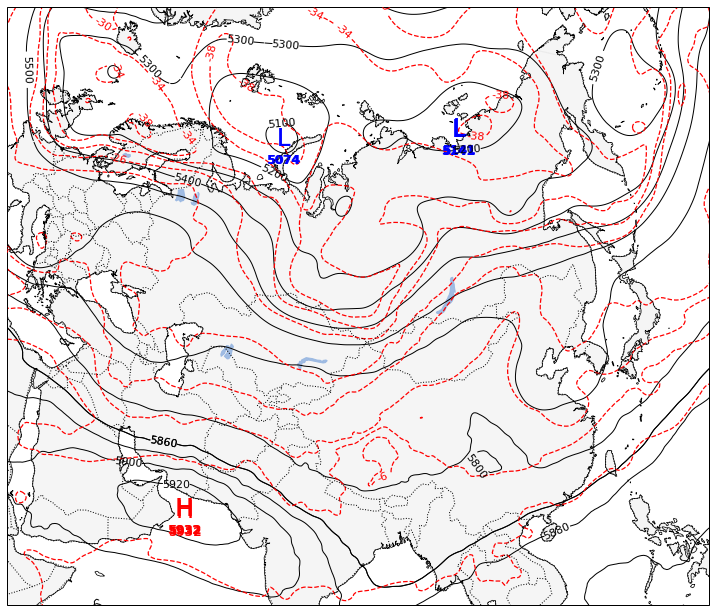

In [23]:
fig = plt.figure(1, figsize=(17., 11.))
ax = plt.subplot(111, projection=mapproj)

# Set extent and plot map lines
ax.set_extent([40, 130, 15, 90], ccrs.PlateCarree())
ax.coastlines('50m', edgecolor='black', linewidth=0.75)
#Add map features
ax.add_feature(cfeature.LAND, facecolor='0.9',alpha=0.4) #Grayscale colors can be set using 0 (black) to 1 (white)
ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
ax.add_feature(cfeature.BORDERS, zorder=10, linestyle=':')
ax.add_feature(cfeature.COASTLINE, zorder=10, linestyle=':')
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)


# Plot thickness with multiple colors
clevs = (np.arange(5100, 5860, 100),
         np.array([5860]),
         np.arange(5860, 5944, 20))
#clevs=np.arange(5900, 5944, 4)
#colors = ('tab:blue', 'b', 'tab:red')
kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
              'rightside_up': True, 'use_clabeltext': True}
#for clevthick, color in zip(clevs, colors):
for clevthick in clevs:
    print(clevthick)
    cs = ax.contour(lon, lat, hgt/9.8, levels=clevthick, colors='k',
                    linewidths=1.0, linestyles='solid', transform=dataproj)
    plt.clabel(cs, **kw_clabels)

# Plot MSLP
clevmslp = np.arange(-50., 0., 4)
cs2 = ax.contour(lon, lat, tem,clevmslp, colors='r', linewidths=1.25,
                 linestyles='dashed', transform=dataproj)
plt.clabel(cs2, **kw_clabels)

# Use definition to plot H/L symbols
plot_maxmin_points(lons, lats, hgt/9.8, 'max', 500, symbol='H', color='r',  transform=dataproj)
plot_maxmin_points(lons, lats, hgt/9.8, 'min', 500, symbol='L', color='b', transform=dataproj)

#plot_maxmin_points(lons, lats, tem, 'max', 500, symbol='H', color='r',  transform=dataproj)
#plot_maxmin_points(lons, lats, tem, 'min', 500, symbol='L', color='b', transform=dataproj)
#urel = ds['u'].sel(level=500).isel(time=1).values*1.944
#vrel = ds['v'].sel(level=500).isel(time=1).values*1.944
urel=ds.u.sel(time=('2015-04-28T06:00:00'), level=500).values*1.944
vrel=ds.v.sel(time=('2015-04-28T06:00:00'), level=500).values*1.944

#Plot the barbs
ax.barbs(lon,lat, urel, vrel, regrid_shape=12, zorder=20, transform=dataproj)
#ax.barbs(lons, lats, urel.values, vrel.values, pivot='middle',
#         color='black', regrid_shape=20, transform=dataproj)
# Put on some titles
plt.title('Geopotential Height(gpm) and Temperature($^\circ$C) with Highs and Lows', loc='left')
#plt.title('VALID: {}'.format(vtime[0]), loc='right')
plt.plot(83.63,39.04,'ro', transform=ccrs.PlateCarree())
plt.text(84.03,39.34, 'TZ',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

https://unidata.github.io/python-gallery/examples/500hPa_HGHT_Winds.html?highlight=barbs
https://unidata.github.io/python-gallery/examples/HILO_Symbol_Plot.html#sphx-glr-examples-hilo-symbol-plot-py